# Aprendizaje no supervisado

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de creación:** Noviembre de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene la explicación inicial del conceptop de aprendizaje no supervisado.

El objetivo es introducir qué es el aprendizaje no supervisado y comentar por qué es importante en negocios.

La idea central *Las máquinas pueden encontrar patrones por si solas, sin necesidad de que alguien les diga cuál es la respuesta correcta*.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.12. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```python
import pandas as pd
print(pd.__version__)
````

# Consideraciones importantes

+ En aprendizaje supervisado hay etiquetas -> **predicción**
+ En aprendizaje no supervisado **no hay etiquetas** -> se buscan estructuras ocultas en los datos
+ Uno de los problemas más importantes: **segmentación o clustering**

In [ ]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/clientes.csv

--2025-12-05 17:44:28--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/clientes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25965 (25K) [text/plain]
Saving to: ‘clientes.csv’

clientes.csv        100%[===================>]  25.36K  --.-KB/s    in 0s      

2025-12-05 17:44:28 (123 MB/s) - ‘clientes.csv’ saved [25965/25965]



# Contexto

Una tienda online quiere entender mejor el comportamiento de sus clientes. Actualmente todos reciben las mismas ofertas, sin embargo, el área de marketing sospecha que existen distintos tipos de clientes.

Dado lo anterior, quieren segmentarlos para:

+ Enviar campañas personalizadas
+ Entender perfiles de compra
+ Optimizar descuentos
+ Mejorar la retención

# Solución - Generar modelo de segmentación

Para generar el modelo se usará un algoritmo de machine learning llamado `K-Means`.

Es un algoritmo que agrupa observaciones en k segmentos según su similitud.

Busca minimizar la distancia entre los puntos y el “centro” de cada grupo (centroide).

K-Means funciona mediante:

+ Elegir número de clusters k
+ Elegir centroides iniciales aleatorios
+ Asignar cada punto al centro más cercano
+ Recalcular centroides
+ Repetir hasta que los centroides se estabilicen

# Explicación del resultado

+ Cada cluster es una nube de puntos
+ Cada cluster tiene un centro (llamado centroide)
+ Los clientes dentro del mismo cluster son más parecidos entre sí

## Puntos importantes al construir un modelo de segmentación

**1.Selección de variables**
+ Deben tener sentido de negocio
+ No deben ser redundantes

**2. Escalamiento de variables**
+ Dado que se usan distancias entonces variables con escalas distintas distorsionan el modelo.
+ Por tanto, se deben estandarizar o normalizar.

**3. Número de clusters (k)**
+ No se debe elegir al azar. Existen métodos para determinar el valor (método del codo: elbow o el índice de la silueta)

**4. Interpretación de los clusters**
+ No basta con que el algoritmo genere grupos, es necesario describir y nombrar los grupos o segmentos.

**5. Valdiación con el negocio**
+ Responder preguntas tales como: ¿son útiles los clusters?, ¿ayudan a orientar acciones/decisiones?, ¿son fáciles de interpretar?


In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

In [ ]:
data = pd.read_csv("clientes.csv")

In [ ]:
data.head()

,frecuencia_compra,monto_promedio,antiguedad_meses,categorias_distintas
0,19,42160,28,3
1,22,50613,29,3
2,26,44490,34,7
3,14,44993,23,5
4,22,41026,32,4


In [ ]:
# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Experimentar con valor de k
inertias = []
silhouettes = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=29)
    km.fit(X_scaled)
    # Almacena inercias y el valor de una métrica
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, km.labels_))

In [ ]:
data.shape

(1998, 4)

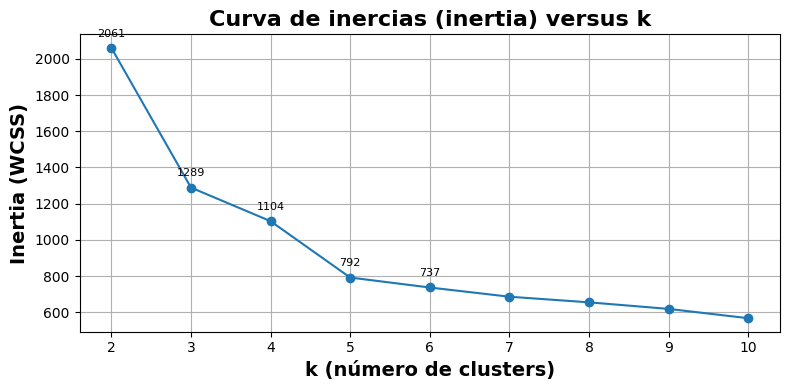

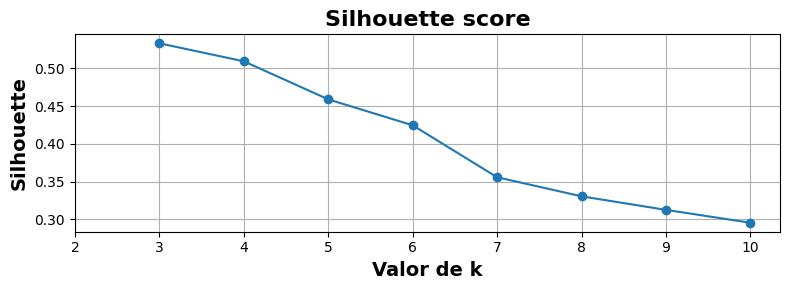

In [ ]:
# Graficar inertias (Elbow plot)
range_k = range(2, 11)
plt.figure(figsize=(8,4))
plt.plot(list(range_k), inertias, marker='o')
plt.title("Curva de inercias (inertia) versus k", fontsize=16, fontweight="bold")
plt.xlabel("k (número de clusters)", fontsize=14, fontweight="bold")
plt.ylabel("Inertia (WCSS)", fontsize=14, fontweight="bold")
plt.xticks(list(range_k))

for k_val, val in zip(list(range_k), inertias):
    if k_val <= 6:
        plt.annotate(f"{val:.0f}", (k_val, val), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafica el índice de silhoutte
plt.figure(figsize=(8,3))
plt.plot(list(range_k)[1:], silhouettes[1:], marker='o')
plt.title("Silhouette score", fontsize=16, fontweight="bold")
plt.xlabel("Valor de k", fontsize=14, fontweight="bold")
plt.ylabel("Silhouette", fontsize=14, fontweight="bold")
plt.xticks(list(range_k))
plt.grid(True)
plt.tight_layout()
plt.show()

# ¿Qué es la  `inertia `?

**Definición matemática**

$inertia=\sum_{k=1}^{K} \min_{i \in C_k} \| x_i - \mu_c \|^2$

donde:
+ $x_i$ es la i-ésima observación (vector de características)
+ $\mu_c$ es el  `centroide ` (media) del cluster $c$
+ Se toma la distancia euclidiana al cuadrado entre cada punto y el centroide de su cluster y se sumasn todas sus distancias

**Definición intuitiva**
+ Mide cuán compactos son los clusters: **suma de las distancias al cuadrado dentro de cada cluster** (también llamado WCSS: within-cluster sum of squares)
+ Un valor pequeño implica que están cerca de sus centroides entonces *CLUSTERS MÁS COMPACTOS*
+ Si se aumenta el valor de $k$ (agrega más clusters), el valor nunca aumenta, tipicamente **disminuye** (o se mantiene) porque más centros permiten reducir la distancia al centroide.
+ El objetivo del algoritmo es **minimizar exactamente esa cantidad** (la función objetivo del algoritmo, problema de optimización)

**Qué muestra la curva de inercias**

+ El **codo** es el punto donde la mejora en inercia se hace marginal al añadir otro cluster: representa un balance entre complejidad (más clusters) y ganancia de compactación.

In [ ]:
# Obtiene el mejor valor de k
kl = KneeLocator(range_k, inertias, curve="convex", direction="decreasing")
print(f"El codo está en k = {kl.elbow}")
print(f"Valor de la inercia = {kl.all_elbows_y[0]: .2f}")

El codo está en k = 5
Valor de la inercia =  792.31


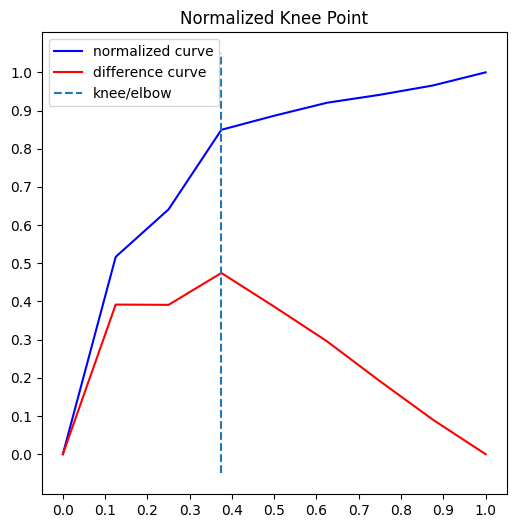

In [ ]:
kl.plot_knee_normalized()

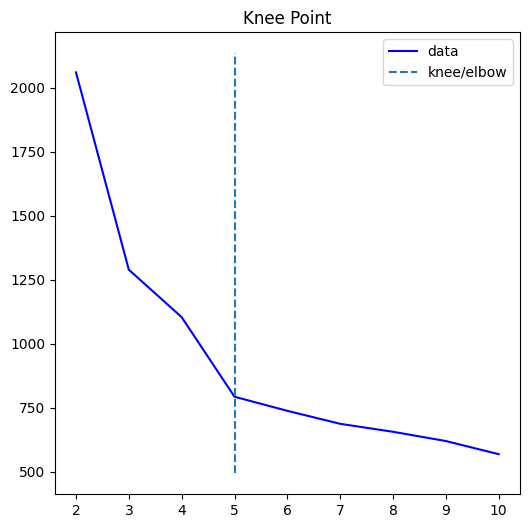

In [ ]:
kl.plot_knee()

In [ ]:
# Elegir k óptimo  para continuar
kmeans = KMeans(n_clusters=kl.elbow, random_state=29)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Interpretación
data.groupby('cluster').mean().round(2)

,frecuencia_compra,monto_promedio,antiguedad_meses,categorias_distintas
cluster,,,,
0,3.05,8051.08,7.98,1.50
1,20.20,45274.52,30.22,4.00
2,9.84,20105.36,15.21,1.52
3,10.18,19985.40,15.22,3.48
4,19.77,45099.55,30.10,6.55


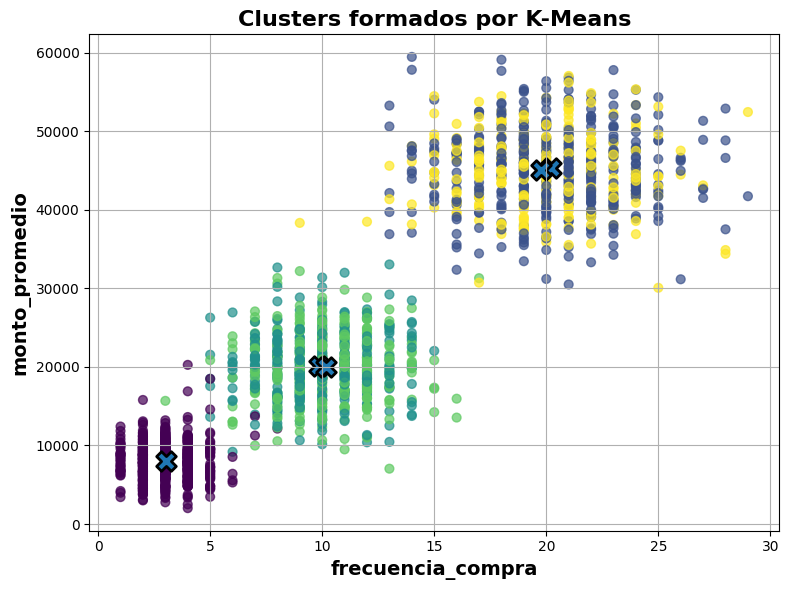

In [ ]:
# Escoge las dos columnas que se incluirán en el análisis
col_x = 'frecuencia_compra'
col_y = 'monto_promedio'

plt.figure(figsize=(8,6))

# Graficar los puntos coloreados por su cluster
plt.scatter(
    data[col_x],
    data[col_y],
    c=data['cluster'],              # etiquetas del clustering
    s=40,
    alpha=0.7
)

# Graficar los centroides
centroids = kmeans.cluster_centers_    # estos están escalados
# Se obtiene al espacio original
centroids_original = scaler.inverse_transform(centroids)

plt.scatter(
    centroids_original[:, data.columns.get_loc(col_x)],
    centroids_original[:, data.columns.get_loc(col_y)],
    marker='X',
    s=200,
    edgecolor='black',
    linewidth=2
)

plt.xlabel(col_x, fontsize=14, fontweight="bold")
plt.ylabel(col_y, fontsize=14, fontweight="bold")
plt.title("Clusters formados por K-Means", fontsize=16, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()


# Comentarios finales

**1. Aprendizaje no supervisado encuentra patrones sin etiquetas**

**2. K-Means permite segmentar clientes**

**3. La clave está en:**
+ Seleccionar variables relevantes
+ Escalar
+ Elegir $k$ de forma seria y con fundamentos
+ Interpretar con criterios de negocio

**4. Recordar:**

*“La segmentación no solo es un ejercicio matemático: debe traducirse en acciones reales para la organización.”*